<a href="https://colab.research.google.com/github/thanhdtnguyen/Python-3-Programming/blob/master/us_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from datascience import *

data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


In [2]:
partial_census_table = full_census_table.select("SEX", "AGE", "POPESTIMATE2010", "POPESTIMATE2014")
partial_census_table

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


In [3]:
# simplify the labels

us_pop = partial_census_table.relabeled("POPESTIMATE2010", "2010").relabeled("POPESTIMATE2014", "2014")
us_pop

SEX,AGE,2010,2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


In [5]:
# change in the population bw 2010 and 2014

change = us_pop.column("2014") - us_pop.column("2010")

In [6]:
census = us_pop.with_columns(
    "Change", change,
    "Percent Change", change/us_pop.column("2010")
)
census.set_format("Percent Change", PercentFormatter)

SEX,AGE,2010,2014,Change,Percent Change
0,0,3951330,3949775,-1555,-0.04%
0,1,3957888,3949776,-8112,-0.20%
0,2,4090862,3959664,-131198,-3.21%
0,3,4111920,4007079,-104841,-2.55%
0,4,4077551,4005716,-71835,-1.76%
0,5,4064653,4006900,-57753,-1.42%
0,6,4073013,4135930,62917,1.54%
0,7,4043046,4155326,112280,2.78%
0,8,4025604,4120903,95299,2.37%
0,9,4125415,4108349,-17066,-0.41%


In [7]:
# sorting

census.sort("Change", descending=True)

SEX,AGE,2010,2014,Change,Percent Change
0,999,309346863,318907401,9560538,3.09%
1,999,152088043,156955337,4867294,3.20%
2,999,157258820,161952064,4693244,2.98%
0,67,2693707,3485241,791534,29.38%
0,64,2706055,3487559,781504,28.88%
0,66,2621335,3347060,725725,27.69%
0,65,2678525,3382824,704299,26.29%
0,71,1953607,2519705,566098,28.98%
0,34,3822189,4364748,542559,14.19%
0,23,4217228,4702156,484928,11.50%


In [9]:
census.sort("AGE", descending=False)

SEX,AGE,2010,2014,Change,Percent Change
0,0,3951330,3949775,-1555,-0.04%
1,0,2018420,2020326,1906,0.09%
2,0,1932910,1929449,-3461,-0.18%
0,1,3957888,3949776,-8112,-0.20%
1,1,2020332,2018401,-1931,-0.10%
2,1,1937556,1931375,-6181,-0.32%
0,2,4090862,3959664,-131198,-3.21%
1,2,2088685,2023673,-65012,-3.11%
2,2,2002177,1935991,-66186,-3.31%
0,3,4111920,4007079,-104841,-2.55%


In [10]:
us_pop

SEX,AGE,2010,2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


In [11]:
us_pop.where("SEX", are.equal_to(0)).where("AGE", are.between(97,101))

SEX,AGE,2010,2014
0,97,68893,83089
0,98,47037,59726
0,99,32178,41468
0,100,54410,71626


In [12]:
# overall proportions of males and females

us_pop_2014 = us_pop.drop("2010")
all_ages = us_pop_2014.where("AGE", are.equal_to(999))
all_ages

SEX,AGE,2014
0,999,318907401
1,999,156955337
2,999,161952064


In [13]:
pop_2014 = all_ages.column("2014").item(0)
all_ages.with_column(
    "Proportion", all_ages.column("2014")/pop_2014
).set_format("Proportion", PercentFormatter)

SEX,AGE,2014,Proportion
0,999,318907401,100.00%
1,999,156955337,49.22%
2,999,161952064,50.78%


In [17]:
# proportions of boys and girls among infants

infants = us_pop_2014.where("AGE", are.equal_to(0))
infants

SEX,AGE,2014
0,0,3949775
1,0,2020326
2,0,1929449


In [18]:
infants_2014 = infants.column("2014").item(0)
infants.with_column(
    "Proportion", infants.column("2014")/infants_2014
).set_format("Proportion", PercentFormatter)

SEX,AGE,2014,Proportion
0,0,3949775,100.00%
1,0,2020326,51.15%
2,0,1929449,48.85%


In [19]:
# female to male gender ratiol at each age

females_all_rows = us_pop_2014.where("SEX",are.equal_to(2))
females = females_all_rows.where("AGE", are.not_equal_to(999))
females

SEX,AGE,2014
2,0,1929449
2,1,1931375
2,2,1935991
2,3,1957483
2,4,1961199
2,5,1962561
2,6,2024870
2,7,2032494
2,8,2015285
2,9,2010659


In [20]:
males_all_rows = us_pop_2014.where("SEX",are.equal_to(1))
males = males_all_rows.where("AGE",are.not_equal_to(999))
males

SEX,AGE,2014
1,0,2020326
1,1,2018401
1,2,2023673
1,3,2049596
1,4,2044517
1,5,2044339
1,6,2111060
1,7,2122832
1,8,2105618
1,9,2097690


In [21]:
males.column("AGE")

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [22]:
females.column("AGE")

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [24]:
ratios = Table().with_columns(
    "AGE", females.column("AGE"),
    "2014 F:M RATIO", females.column("2014")/males.column("2014")
)
ratios

AGE,2014 F:M RATIO
0,0.955019
1,0.956884
2,0.956672
3,0.955058
4,0.959248
5,0.959998
6,0.959172
7,0.957445
8,0.957099
9,0.958511


In [28]:
ratios.sort("AGE", descending=True)

AGE,2014 F:M RATIO
100,4.25966
99,3.63278
98,3.41826
97,3.09104
96,2.87998
95,2.67253
94,2.52285
93,2.33359
92,2.2299
91,2.09488


In [29]:
ratios.where("AGE", are.above(75)).show()

AGE,2014 F:M RATIO
76,1.23487
77,1.25797
78,1.28244
79,1.31627
80,1.34138
81,1.37967
82,1.41932
83,1.46552
84,1.52048
85,1.5756


In [30]:
males.where("AGE", are.between(98,100))

SEX,AGE,2014
1,98,13518
1,99,8951


In [31]:
females.where("AGE", are.between(98,100))

SEX,AGE,2014
2,98,46208
2,99,32517


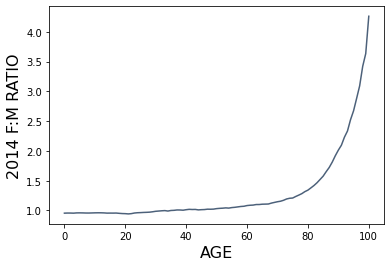

In [32]:
ratios.plot("AGE")